In [1]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Grab edge list data hosted on Gist
edgelist = pd.read_csv('edgelist.csv')

In [2]:
#edgelist.head(10)

In [3]:
nodelist = pd.read_csv('nodelist.csv')
nodelist

,id,X,Y
0,W_1,64.896,59.3755
1,R_1,91.896,59.3755
2,R_2,54.896,59.3755
3,R_7,54.896,93.3755
4,W_2,64.937,40.3755
5,R_3,84.937,40.3755
6,R_4,64.937,29.3755
7,R_5,56.396,8.5000
8,R_6,41.674,0.0000
9,W_3,38.896,59.3755


In [4]:
# Create empty graph
g = nx.Graph()
# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [5]:
# Add node attributes
for i, nlrow in nodelist.iterrows():
    g.nodes[nlrow['id']].update(nlrow[1:].to_dict())

In [6]:
# Edge list example
#print(elrow[0]) # node1
#print(elrow[1]) # node2
#print(elrow[2:].to_dict()) # edge attribute dict

In [7]:
g.nodes(data=True)

NodeDataView({'W_1': {'X': 64.896, 'Y': 59.3755}, 'R_1': {'X': 91.896, 'Y': 59.3755}, 'R_2': {'X': 54.896, 'Y': 59.3755}, 'R_7': {'X': 54.896, 'Y': 93.3755}, 'W_2': {'X': 64.937, 'Y': 40.3755}, 'R_3': {'X': 84.93700000000001, 'Y': 40.3755}, 'R_4': {'X': 64.937, 'Y': 29.3755}, 'R_5': {'X': 56.396, 'Y': 8.5}, 'R_6': {'X': 41.674, 'Y': 0.0}, 'W_3': {'X': 38.896, 'Y': 59.3755}, 'R_8': {'X': 28.896, 'Y': 59.3755}, 'R_9': {'X': 0.0, 'Y': 98.2715}})

In [8]:
#for node in g.nodes(data=True):
    #print(node[1]['X'])

In [9]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])

{'W_1': (64.896, -59.3755),
 'R_1': (91.896, -59.3755),
 'R_2': (54.896, -59.3755),
 'R_7': (54.896, -93.3755),
 'W_2': (64.937, -40.3755)}

In [10]:
# Define data structure (list) of edge colors for plotting
node_colors = []
for n in g.nodes(data=True):
    if n[0][0] == 'W':
        node_colors.append('red')
    elif n[0][0] == 'R':
        node_colors.append('blue')
#node_colors

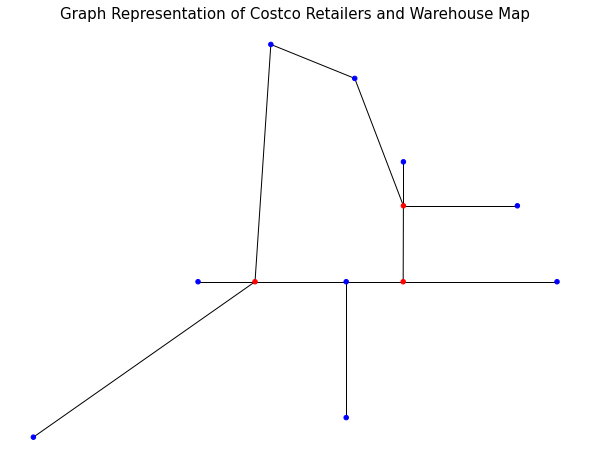

In [11]:
plt.figure(figsize=(8, 6))
nx.draw(g, pos=node_positions, node_size=20, node_color=node_colors)
plt.title('Graph Representation of Costco Retailers and Warehouse Map', size=15)
plt.show()